In [525]:
import math
import random

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [3, 3]
plt.rcParams['figure.dpi'] = 100

In [526]:
def gen(n, s=0.1):
    x, y, r = random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(0, 10)
    pt = []
    for i in range(n):
        a = random.uniform(0, math.tau)
        pt.append((x + (r + random.gauss(0, s*r))*math.cos(a), y + (r + random.gauss(0, s*r))*math.sin(a)))
    return np.array(pt), x, y, r

def gen1(n, s=0.1, k=1):
    x, y, r = random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(0, 10)
    pt = []
    for i in range(n):
        a = random.uniform(-1, 1)**(2*k+1) * math.tau
        pt.append((x + (r + random.gauss(0, s*r))*math.cos(a), y + (r + random.gauss(0, s*r))*math.sin(a)))
    return np.array(pt), x, y, r

-3.6143238992248854 -0.4277792146748194 1.7646997665935948


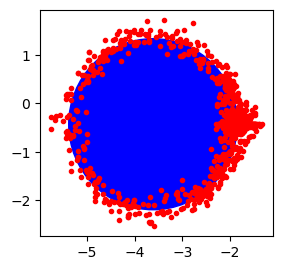

In [527]:
pt, x0, y0, r0 = gen1(1000, 0.1, 2)
print(x0, y0, r0)
plt.plot(pt[:,0], pt[:,1], 'r.')
plt.gcf().gca().add_artist(plt.Circle((x0, y0), r0, color='b'))

In [550]:
def loss(pt, circ):
    x, y, r = circ
    return ((((pt - [x, y])**2).sum(axis=-1)**.5 - r)**2).mean()**0.5 + max(-r, 0)

loss(pt, (x0, y0, r0))

0.1612616549602863

In [551]:
def guess(pt):
    return *pt.mean(axis=0), (np.max(pt, axis=0) - np.min(pt, axis=0)).mean()

guess(pt)

(-2.5487791440330203, -0.4242909904317047, 4.335556114554642)

In [552]:
def neighbour(pt, circ, T):
    d = (np.max(pt, axis=0) - np.min(pt, axis=0)).mean() / 8
    return circ + T * np.random.randn(3)

In [553]:
def annealing(problem, loss, guess, neighbour, Tmax, Tmin, n=0.99, k=1):
    T = Tmax
    state = neighbour(problem, guess(problem), T)
    E = loss(problem, state)
    print("ziuum")
    while T > Tmin:
        state1 = neighbour(problem, state, T)
        E1 = loss(problem, state1)
        p = math.e**((E - E1) / (k*T))
        print(f"\rT={T: <12.8f} E={E: <15.8f} p={min(p, 1)}", end="", flush=random.randint(0, 20) == 0)
        if random.random() < p:
            state, E = state1, E1
        T *= n
    print()
    return state

ziuum
T=0.01000040   E=1.08611436      p=1.765076243819069536
35.51668245009792 -27.082934060060822 46.61060226783641
-3.6143238992248854 -0.4277792146748194 1.7646997665935948
0.1612616549602863
1.0857809827363245


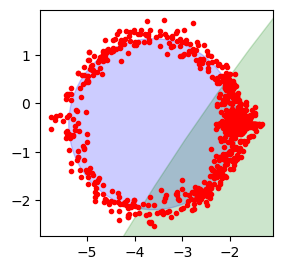

In [554]:
x1, y1, r1 = annealing(pt, loss, guess, neighbour, 1, 1e-2, (1 - 1e-4), 1)
print(x1, y1, r1)
print(x0, y0, r0)

plt.plot(pt[:,0], pt[:,1], 'r.')
plt.gcf().gca().add_artist(plt.Circle((x0, y0), r0, color='b', alpha=0.2))
plt.gcf().gca().add_artist(plt.Circle((x1, y1), r1, color='g', alpha=0.2))

print(loss(pt, (x0, y0, r0)))
print(loss(pt, (x1, y1, r1)))